## Программирование и анализ данных

*Алла Тамбовцева, НИУ ВШЭ*

### Семинар 9 по теме: визуализация и использование виджетов

Файл `Chile.txt` содержит результаты опроса перед плебисцитом 1988 года в Чили.

**Показатели:**

* `region`: регион, где живет респондент (`C`, Central; `M`, Metropolitan Santiago area; `N`, North; `S`, South; `SA`, City of Santiago);
* `sex`: пол респондента;
* `population`: численность населения в регионе респондента;
* `age`: возраст респондента;
* `education`: уровень образования респондента (`P`, Primary; `PS`, Post-secondary; `S`, Secondary);
* `income`: доход респондента;
* `statusquo`: индекс отношения к статус-кво (чем больше значение, тем больше человек склонен одобрять сохранение статус-кво – нахождение Пиночета у власти);
* `vote`: как респондент собирается голосовать (`A`, will abstain; `N`, will vote no – against Pinochet; `U`, undecided; `Y`, will vote yes – for Pinochet).

#### Задание 1

Загрузите файл `Chile.txt` и считайте строки из него в переменную `lines`, используя код ниже:
    
        f = open("Chile.txt", encoding = "UTF-8")
        lines = f.readlines()
        
**Пояснения к коду:** функция `open()` открывает файл, а метод `readlines()` разбивает текстовый файл на строки и возвращает список этих строк. 

Удобно ли работать с данными в `lines`? 

In [1]:
f = open("Chile.txt", encoding = "UTF-8")
lines = f.readlines()

In [2]:
lines[0]  # не очень удобно

'"","region","population","sex","age","education","income","statusquo","vote"\n'

#### Задание 2

Загрузите файл `Chile.txt`, используя функцию `read_table()` из библиотеки `pandas` и считая, что разделителем столбцов считается запятая. Сохраните результат в переменную `ch`.

In [3]:
import pandas as pd
ch = pd.read_table("Chile.txt", sep = ",")

#### Задание 3

Удалите из датафрейма `ch` строки с пропущенными значениями, сохраните изменения.

In [4]:
ch.dropna(inplace = True)

#### Задание 4

Создайте виджет типа `Dropdown`, выпадающее меню, где опциями меню являются названия столбцов датафрейма `ch`, кроме `Unnamed:0`, значением по умолчанию является `population`. Сохраните его в переменную `choose` и выведите на экран.

In [5]:
import ipywidgets as widgets
choose = widgets.Dropdown(options = ch.columns[1:], 
                          value = "population")
display(choose)

Dropdown(index=1, options=('region', 'population', 'sex', 'age', 'education', 'income', 'statusquo', 'vote'), …

#### Задание 5

Напишите функцию `desc_plot()`, которая принимает на вход строку с названием столбца, которое выбрал пользователь в выпадающем меню, и строит соответствующий график:

* если тип столбца `object`, то строит гистограмму;
* если тип столбца не `object`, то строит столбиковую диаграмму.

In [6]:
import seaborn as sns
sns.set()

def desc_plot(c):
    if ch[c].dtype == "object":
        tab = ch[c].value_counts()
        x = tab.index
        y = tab.values
        sns.barplot(x, y)
    else:
        sns.distplot(ch[c])

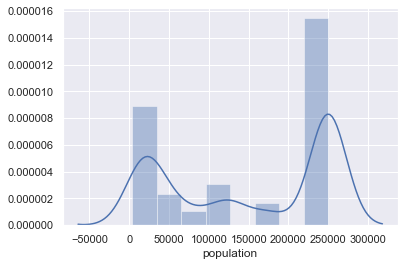

In [7]:
desc_plot(choose.value) 